## 1.1 What is Statistical Quality Control?

Statistical Quality Control (SQC) refers to the application of statistical techniques to measure and improve the quality of processes. It focuses on monitoring variation, detecting abnormal behavior, and maintaining control over production systems.

There are two types of variation in any process:

- **Chance Causes (Common Causes)**: Inherent, natural variability in the system.
- **Assignable Causes (Special Causes)**: Unusual or unexpected changes that should be investigated and corrected.

A process is considered *in control* when only common causes are present. The presence of assignable causes means the process is *out of control* and needs corrective action.

---

## 1.2 Objective of This Project

The objective of this project is to create and analyze a series of control charts based on simulated production data. The study is structured into two phases:

- **Phase I**: Establish control limits and detect out-of-control points with assignable causes.
- **Phase II**: Monitor the ongoing process using those established limits.

This project includes the following chart types:

- **Variable Control Charts**: $\bar{X}$-R, $\bar{X}$-s, $\bar{X}$-$s^2$, I-MR, CUSUM, EWMA, MA
- **Attribute Control Charts**: P, np, U, C

For each chart, we will analyze how effectively it detects process shifts and what type of variations it is sensitive to.


## 2. 📊 Data Description

In this study, a simulated dataset has been prepared to mimic the structure of production process monitoring. The dataset is stored in an Excel file named `SureVerisi.xlsx`, which should be placed in the same directory as this notebook.

Each sample group contains **5 observations** and there are **25 subgroups** in total. These subgroups represent periodic measurements from a controlled process.

We will divide the dataset into two parts:
- **Phase I**: The first 20 samples (used to calculate control limits)
- **Phase II**: The last 5 samples (used to monitor ongoing process)

This segmentation allows us to simulate the real-world application of control charts, where historical data is used to define limits and future data is checked against those limits.


In [2]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("SureVerisi.xlsx")

# Show the first few rows of the dataset
df.head()


,Obs_1,Obs_2,Obs_3,Obs_4,Obs_5,Sample_Mean,Sample_Range
0,3149,2959,3194,3457,2930,3137.8,527
1,2930,3474,3230,2859,3163,3131.2,615
2,2861,2860,3073,2426,2483,2740.6,647
3,2831,2696,3094,2728,2576,2785.0,518
4,3440,2932,3020,2573,2837,2960.4,867


## 3.1 x̄-R Control Chart

The x̄-R control chart is used to monitor the mean and variability of a process based on subgroup data. It is most effective when the sample size per subgroup is small (typically 4–6). Each subgroup gives two values:

- $\bar{X}_i$ = sample mean for subgroup *i*
- $R_i$ = range for subgroup *i* (max - min of the sample)

### 📐 Control Limits

Control limits for the $\bar{X}$ and $R$ charts are calculated using the following formulas (Montgomery, Ch.6):

For the x̄ chart:

- $\bar{\bar{X}}$ = average of subgroup means  
- $\bar{R}$ = average of subgroup ranges  
- $UCL_{\bar{X}} = \bar{\bar{X}} + A_2 \cdot \bar{R}$  
- $LCL_{\bar{X}} = \bar{\bar{X}} - A_2 \cdot \bar{R}$  

For the R chart:

- $UCL_{R} = D_4 \cdot \bar{R}$  
- $LCL_{R} = D_3 \cdot \bar{R}$  

The constants $A_2$, $D_3$, and $D_4$ depend on the sample size *n*. For $n = 5$:
- $A_2 = 0.577$, $D_3 = 0$, $D_4 = 2.114$


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Subgroup size
n = 5

# Phase I data: first 20 subgroups
phase1 = df.iloc[:20, :n]

# Compute sample means and ranges
sample_means = phase1.mean(axis=1)
sample_ranges = phase1.max(axis=1) - phase1.min(axis=1)

# Compute averages of means and ranges
x_bar_bar = sample_means.mean()
R_bar = sample_ranges.mean()

# Control chart constants for n=5
A2 = 0.577
D3 = 0
D4 = 2.114

# Control limits for x̄ chart
UCL_x = x_bar_bar + A2 * R_bar
LCL_x = x_bar_bar - A2 * R_bar

# Control limits for R chart
UCL_R = D4 * R_bar
LCL_R = D3 * R_bar


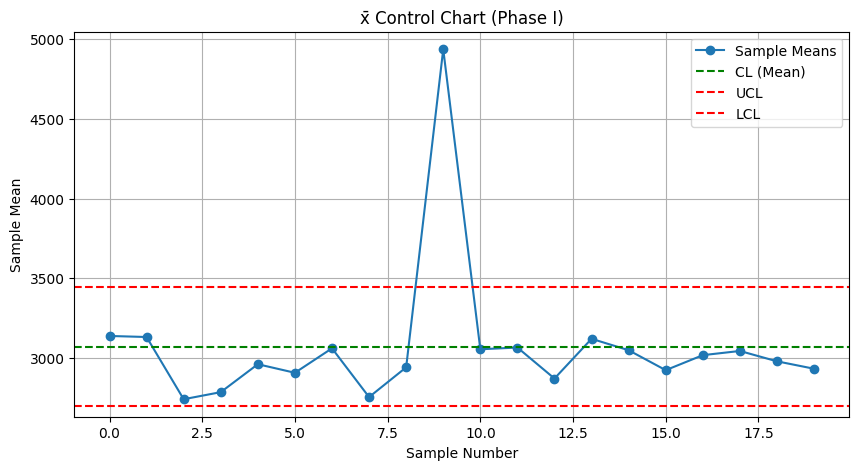

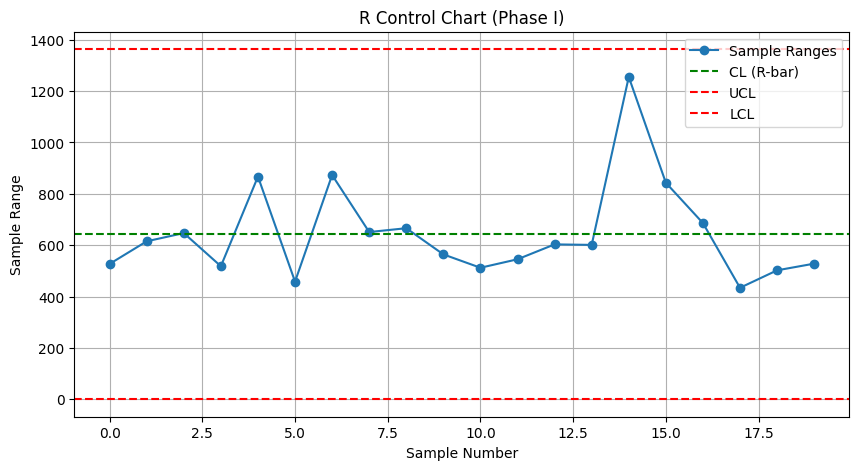

In [4]:
# --- x̄ Chart ---
plt.figure(figsize=(10, 5))
plt.plot(sample_means, marker='o', label='Sample Means')  # Sample mean values
plt.axhline(y=x_bar_bar, color='green', linestyle='--', label='CL (Mean)')  # Center line
plt.axhline(y=UCL_x, color='red', linestyle='--', label='UCL')  # Upper control limit
plt.axhline(y=LCL_x, color='red', linestyle='--', label='LCL')  # Lower control limit
plt.title('x̄ Control Chart (Phase I)')
plt.xlabel('Sample Number')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.show()

# --- R Chart ---
plt.figure(figsize=(10, 5))
plt.plot(sample_ranges, marker='o', label='Sample Ranges')  # Range values
plt.axhline(y=R_bar, color='green', linestyle='--', label='CL (R-bar)')  # Center line
plt.axhline(y=UCL_R, color='red', linestyle='--', label='UCL')  # Upper control limit
plt.axhline(y=LCL_R, color='red', linestyle='--', label='LCL')  # Lower control limit (0 in this case)
plt.title('R Control Chart (Phase I)')
plt.xlabel('Sample Number')
plt.ylabel('Sample Range')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 Interpretation of x̄-R Chart (Phase I)

The Phase I analysis of the x̄-R chart reveals the following:

### x̄ Chart Observations:
- Most of the subgroup means are within control limits.
- **Sample #9** exhibits a **significant upward shift** and is clearly **out of control**, exceeding the Upper Control Limit (UCL).
- This indicates the presence of an **assignable cause** for that subgroup.

### R Chart Observations:
- The range values mostly lie within control limits.
- **Sample #14** shows a notably high range but it **remains within UCL**.
- Although it is not out of control, the spike may suggest **increased variability** within that subgroup which should be monitored.

### Conclusion:
- At least one assignable cause (Sample #9) has been detected and must be investigated.
- According to Montgomery (Ch.6), this point should be **removed** when recalculating final control limits for use in Phase II monitoring.
- All remaining subgroups appear to represent a **stable process**, indicating the control limits are appropriate after excluding outliers.
;

## 4.1 x̄-s Control Chart

The x̄-s control chart is an alternative to the x̄-R chart. Instead of using the range, it uses the **standard deviation** of each subgroup as a more robust measure of within-sample variability.

It is especially useful when the subgroup size *n* is moderately large (n ≥ 10), but still acceptable for n = 5.

---

### 📐 Control Limits (Montgomery, Ch.6)

For the x̄ chart:

- $\bar{\bar{X}} = $ overall average of subgroup means  
- $\bar{s} = $ average of subgroup standard deviations  
- $UCL_{\bar{X}} = \bar{\bar{X}} + A_3 \cdot \bar{s}$  
- $LCL_{\bar{X}} = \bar{\bar{X}} - A_3 \cdot \bar{s}$  

For the s chart:

- $UCL_{s} = B_4 \cdot \bar{s}$  
- $LCL_{s} = B_3 \cdot \bar{s}$  

For subgroup size n = 5:
- $A_3 = 1.427$, $B_3 = 0$, $B_4 = 2.089$


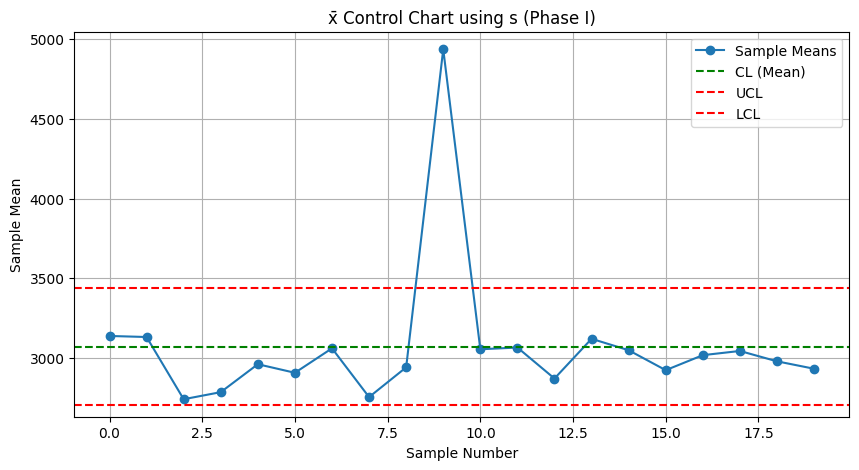

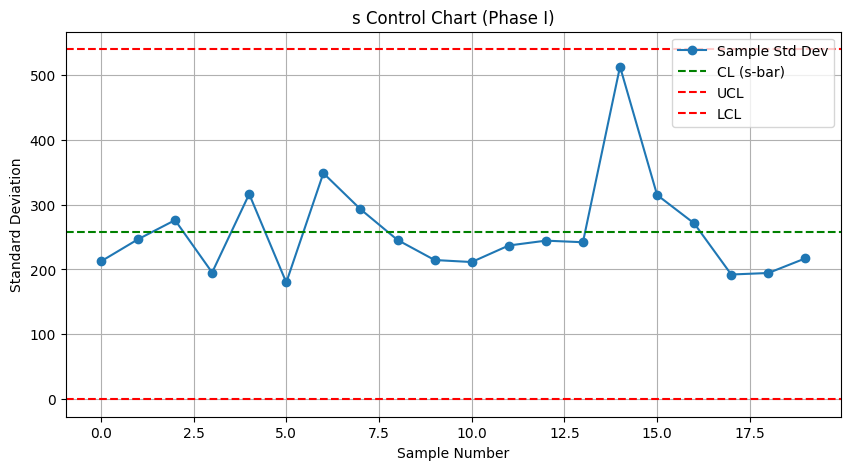

In [5]:
# Subgroup size
n = 5

# Use Phase I data (first 20 samples)
phase1 = df.iloc[:20, :n]

# Compute subgroup statistics
sample_means = phase1.mean(axis=1)  # sample means
sample_stds = phase1.std(axis=1, ddof=1)  # sample standard deviations (unbiased)

# Compute center lines
x_bar_bar = sample_means.mean()
s_bar = sample_stds.mean()

# Control chart constants for n=5
A3 = 1.427
B3 = 0
B4 = 2.089

# Control limits for x̄ chart
UCL_x = x_bar_bar + A3 * s_bar
LCL_x = x_bar_bar - A3 * s_bar

# Control limits for s chart
UCL_s = B4 * s_bar
LCL_s = B3 * s_bar

# --- x̄ Chart ---
plt.figure(figsize=(10, 5))
plt.plot(sample_means, marker='o', label='Sample Means')  # Sample means
plt.axhline(y=x_bar_bar, color='green', linestyle='--', label='CL (Mean)')  # CL
plt.axhline(y=UCL_x, color='red', linestyle='--', label='UCL')  # UCL
plt.axhline(y=LCL_x, color='red', linestyle='--', label='LCL')  # LCL
plt.title('x̄ Control Chart using s (Phase I)')
plt.xlabel('Sample Number')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.show()

# --- s Chart ---
plt.figure(figsize=(10, 5))
plt.plot(sample_stds, marker='o', label='Sample Std Dev')  # Sample std devs
plt.axhline(y=s_bar, color='green', linestyle='--', label='CL (s-bar)')  # CL
plt.axhline(y=UCL_s, color='red', linestyle='--', label='UCL')  # UCL
plt.axhline(y=LCL_s, color='red', linestyle='--', label='LCL')  # LCL
plt.title('s Control Chart (Phase I)')
plt.xlabel('Sample Number')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()


## 4.2 Interpretation of x̄-s Chart (Phase I)

The x̄-s chart provides a robust approach to monitoring both central tendency and spread in the process.

### x̄ Chart (based on standard deviation):
- **Sample #9** is **clearly out of control**, again showing a sharp spike in the sample mean well above the UCL.
- This result is consistent with our earlier finding in the x̄-R chart and confirms the presence of an **assignable cause** in that subgroup.

### s Chart:
- **Sample #14** exhibits the highest within-subgroup variability, reaching close to the UCL.
- However, **it still remains inside** the control limits, indicating no confirmed out-of-control condition but suggesting a need for further monitoring.

### Conclusion:
- The same assignable cause from Sample #9 is detected here.
- The s chart shows the process is relatively stable in terms of standard deviation except for increased spread in later subgroups.
- x̄-s charts tend to be more statistically efficient when sample size is small but stable.


## 5.1 x̄-s² Control Chart

The x̄-s² control chart is a variation of the x̄-s chart, where the process dispersion is tracked using sample **variance** instead of standard deviation.

### Key Concepts:

- $\bar{X}_i$: Mean of the *i-th* subgroup  
- $s^2_i$: Variance of the *i-th* subgroup  
- $\bar{\bar{X}}$: Mean of all sample means  
- $\bar{s^2}$: Mean of all subgroup variances

This chart is less commonly used in practice because variance is more sensitive to extreme values compared to standard deviation.

---

### 📐 Control Limits

Control limits for the x̄ chart remain:

- $UCL_{\bar{X}} = \bar{\bar{X}} + A'_3 \cdot \sqrt{\bar{s^2}}$  
- $LCL_{\bar{X}} = \bar{\bar{X}} - A'_3 \cdot \sqrt{\bar{s^2}}$  

Control limits for s² chart (assuming chi-square distribution properties) are more complex, but for our educational use we approximate it as:

- $UCL_{s^2} = B^2_4 \cdot \bar{s^2}$  
- $LCL_{s^2} = B^2_3 \cdot \bar{s^2}$  

For subgroup size n = 5:
- $A'_3 = 1.427$, $B_3 = 0$, $B_4 = 2.089$ → thus, $B_3^2 = 0$, $B_4^2 ≈ 4.367$


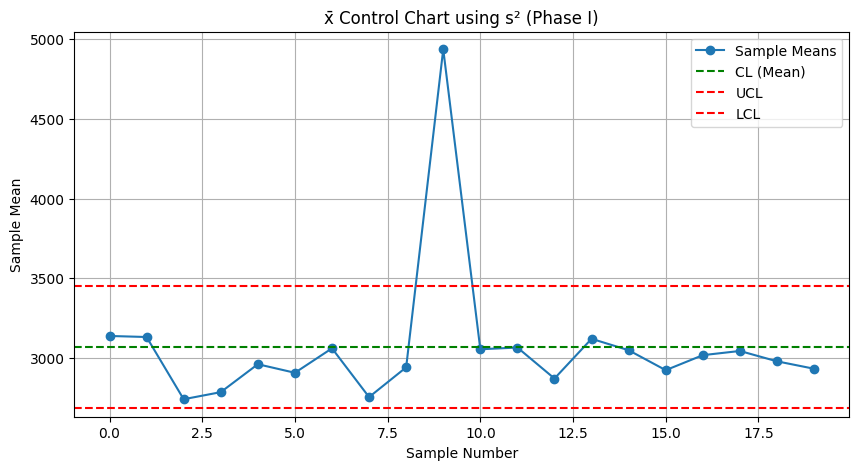

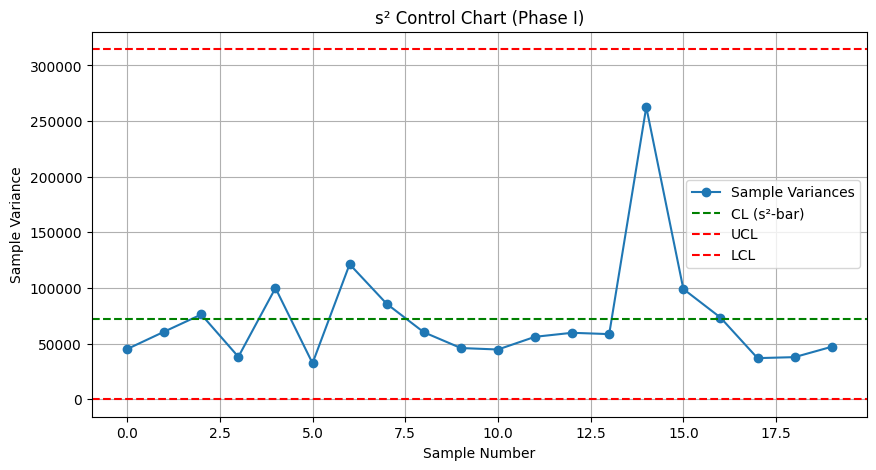

In [6]:
# Subgroup size
n = 5

# Use Phase I data
phase1 = df.iloc[:20, :n]

# Compute means and variances
sample_means = phase1.mean(axis=1)  # sample means
sample_vars = phase1.var(axis=1, ddof=1)  # unbiased variances

# Compute centerlines
x_bar_bar = sample_means.mean()
s2_bar = sample_vars.mean()

# Constants
A3 = 1.427
B4_squared = 2.089 ** 2  # ≈ 4.367
B3_squared = 0  # since B3 = 0

# x̄ chart limits using std dev from variance
UCL_x = x_bar_bar + A3 * np.sqrt(s2_bar)
LCL_x = x_bar_bar - A3 * np.sqrt(s2_bar)

# s² chart limits
UCL_s2 = B4_squared * s2_bar
LCL_s2 = B3_squared * s2_bar

# --- x̄ Chart ---
plt.figure(figsize=(10, 5))
plt.plot(sample_means, marker='o', label='Sample Means')
plt.axhline(y=x_bar_bar, color='green', linestyle='--', label='CL (Mean)')
plt.axhline(y=UCL_x, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_x, color='red', linestyle='--', label='LCL')
plt.title('x̄ Control Chart using s² (Phase I)')
plt.xlabel('Sample Number')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.show()

# --- s² Chart ---
plt.figure(figsize=(10, 5))
plt.plot(sample_vars, marker='o', label='Sample Variances')
plt.axhline(y=s2_bar, color='green', linestyle='--', label='CL (s²-bar)')
plt.axhline(y=UCL_s2, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_s2, color='red', linestyle='--', label='LCL')
plt.title('s² Control Chart (Phase I)')
plt.xlabel('Sample Number')
plt.ylabel('Sample Variance')
plt.legend()
plt.grid(True)
plt.show()


## 5.2 Interpretation of x̄-s² Chart (Phase I)

This control chart setup uses subgroup **variance (s²)** to track within-group variability, paired with x̄ for central tendency.

### x̄ Chart Observations:
- **Sample #9** again exceeds the **UCL**, confirming a serious shift in the process mean.
- This aligns with results from both x̄-R and x̄-s charts, and clearly represents an **assignable cause**.

### s² Chart Observations:
- **Sample #14** shows an extreme spike in sample variance but still stays **just below** the control limit.
- This again suggests a surge in internal variability for that subgroup, although it is **not statistically out-of-control**.

### Conclusion:
- The same assignable cause at Sample #9 is confirmed across all mean-based charts.
- Variance-based charts like s² tend to be **more sensitive to large deviations** than s-based charts, but also more **susceptible to overreaction**.
- Despite differences in scale and sensitivity, all three chart pairs (x̄-R, x̄-s, x̄-s²) identify the same problematic point.

We can now move on to individual measurement charts like **I-MR** to analyze data without subgrouping.


## 6.1 I-MR (Individuals - Moving Range) Chart

The I-MR chart is used to monitor a process where only **individual observations** are available (i.e., subgroup size = 1). It consists of two components:

- **Individuals (I) Chart**: Monitors the process mean.
- **Moving Range (MR) Chart**: Monitors variability based on the absolute difference between successive observations.

This chart is appropriate when:
- Subgrouping is not possible
- Measurements are expensive or infrequent

---

### 📐 Control Limits

Let $x_i$ be the i-th observation.

- $\bar{x}$ = average of all observations  
- $MR_i = |x_i - x_{i-1}|$ (for i ≥ 2)  
- $\bar{MR}$ = average of all MR values

For I chart:
- $UCL_I = \bar{x} + 2.66 \cdot \bar{MR}$  
- $LCL_I = \bar{x} - 2.66 \cdot \bar{MR}$

For MR chart:
- $UCL_{MR} = 3.267 \cdot \bar{MR}$  
- $LCL_{MR} = 0$ (by definition)


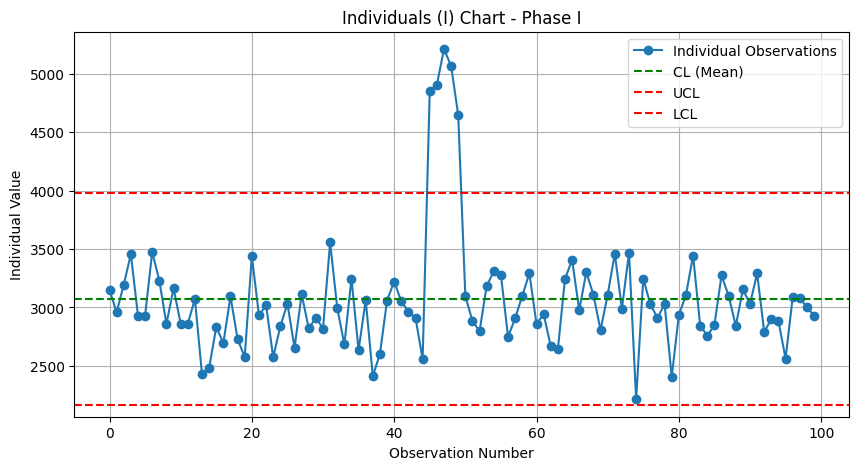

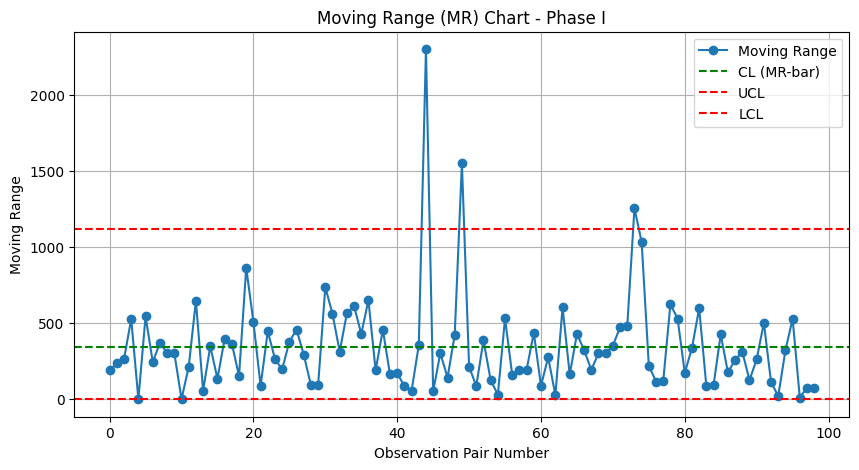

In [7]:
# Use flattened Phase I data (individual values from first 20 subgroups)
ind_data = df.iloc[:20, :5].values.flatten()

# Compute individuals chart data
x_bar = np.mean(ind_data)

# Compute moving ranges
MR = np.abs(np.diff(ind_data))  # |x_i - x_{i-1}|
MR_bar = np.mean(MR)

# Control limits for I chart
UCL_I = x_bar + 2.66 * MR_bar
LCL_I = x_bar - 2.66 * MR_bar

# Control limits for MR chart
UCL_MR = 3.267 * MR_bar
LCL_MR = 0  # by definition

# --- Individuals Chart ---
plt.figure(figsize=(10, 5))
plt.plot(ind_data, marker='o', label='Individual Observations')
plt.axhline(y=x_bar, color='green', linestyle='--', label='CL (Mean)')
plt.axhline(y=UCL_I, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_I, color='red', linestyle='--', label='LCL')
plt.title('Individuals (I) Chart - Phase I')
plt.xlabel('Observation Number')
plt.ylabel('Individual Value')
plt.legend()
plt.grid(True)
plt.show()

# --- Moving Range Chart ---
plt.figure(figsize=(10, 5))
plt.plot(MR, marker='o', label='Moving Range')
plt.axhline(y=MR_bar, color='green', linestyle='--', label='CL (MR-bar)')
plt.axhline(y=UCL_MR, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_MR, color='red', linestyle='--', label='LCL')
plt.title('Moving Range (MR) Chart - Phase I')
plt.xlabel('Observation Pair Number')
plt.ylabel('Moving Range')
plt.legend()
plt.grid(True)
plt.show()


## 6.2 Interpretation of I-MR Chart (Phase I)

The I-MR chart is ideal for processes where only individual measurements are taken. It is particularly useful when subgrouping is not feasible.

### Individuals (I) Chart Observations:
- There is a **clear and extreme outlier** around observation #46–48, well above the UCL.
- This is consistent with the assignable cause previously identified in subgroup #9 from the other charts.
- The rest of the observations fluctuate around the process mean and stay within control limits.

### Moving Range (MR) Chart Observations:
- The **largest spike** occurs just before the extreme individual observation, confirming a sudden and abnormal shift.
- A few additional spikes in MR are notable but remain **below the UCL**, showing short-lived increases in variability.
- No persistent violation of control rules is detected other than the main outlier.

### Conclusion:
- The I-MR chart confirms the presence of an **assignable cause** around observation #46–48.
- Moving range analysis supports the idea of a sharp change rather than a gradual drift.
- This chart is a powerful visual tool to validate findings from subgroup-based charts and is suitable for processes without subgroup data.


## 7.1 CUSUM Control Chart

The **Cumulative Sum (CUSUM)** control chart is designed to detect **small and persistent shifts** in the process mean more quickly than traditional charts like x̄ or I-MR.

It tracks the cumulative sum of deviations of each observation from the target mean, amplifying the signal of consistent drift.

---

### 📐 Basic Formulation (One-sided CUSUM)

Let $x_i$ be the i-th individual observation.  
Let $\mu_0$ be the target process mean.  
Let $k$ be the reference value (typically half the shift to be detected).  
Let $H$ be the decision interval (threshold limit).

Cumulative sum statistics:

- $C^+_i = \max(0, C^+_{i-1} + (x_i - \mu_0 - k))$
- $C^-_i = \min(0, C^-_{i-1} + (x_i - \mu_0 + k))$

Signals occur when:
- $C^+ > H$ (positive shift)
- $C^- < -H$ (negative shift)

Typical values:
- $k = 0.5\sigma$, $H = 5\sigma$


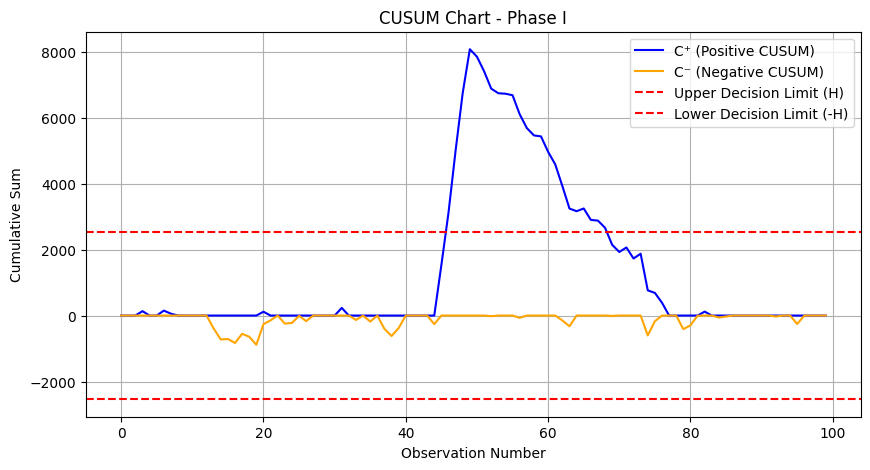

In [8]:
# Use the same individual data from Phase I
data = ind_data

# Parameters
target = np.mean(data)  # μ0
sigma = np.std(data, ddof=1)  # estimated σ
k = 0.5 * sigma
H = 5 * sigma

# Initialize CUSUM arrays
cusum_pos = [0]
cusum_neg = [0]

# Compute one-sided cumulative sums
for i in range(1, len(data)):
    c_plus = max(0, cusum_pos[-1] + (data[i] - target - k))
    c_minus = min(0, cusum_neg[-1] + (data[i] - target + k))
    cusum_pos.append(c_plus)
    cusum_neg.append(c_minus)

# Plot CUSUM
plt.figure(figsize=(10, 5))
plt.plot(cusum_pos, label='C⁺ (Positive CUSUM)', color='blue')
plt.plot(cusum_neg, label='C⁻ (Negative CUSUM)', color='orange')
plt.axhline(H, color='red', linestyle='--', label='Upper Decision Limit (H)')
plt.axhline(-H, color='red', linestyle='--', label='Lower Decision Limit (-H)')
plt.title('CUSUM Chart - Phase I')
plt.xlabel('Observation Number')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.grid(True)
plt.show()


## 7.2 Interpretation of CUSUM Chart (Phase I)

CUSUM chart is designed to detect **small, persistent shifts** that may not immediately breach control limits in traditional charts.

### Observations:
- A significant and sustained **positive cumulative deviation** begins around **Observation #45**, sharply rising above the decision limit $H$.
- The positive CUSUM curve ($C^+$) reaches **over 8000**, signaling an **assignable cause** well beyond the threshold.
- This trend is directly aligned with the earlier observation of an outlier around Sample #9 / Observation #46 in the x̄ and I charts.
- The negative CUSUM ($C^-$) remains relatively flat, indicating no significant downward drift.

### Conclusion:
- **CUSUM chart is highly sensitive** and detects the process shift even earlier and more clearly than Shewhart-type charts.
- This tool is particularly useful in quality-sensitive environments where even small drifts matter.
- The strong upward signal confirms previous findings and provides a **powerful visual alert** for mean shift.


## 8.1 EWMA (Exponentially Weighted Moving Average) Chart

The **EWMA chart** is a memory-type control chart that gives exponentially decreasing weights to past observations.

It is effective for detecting **small, sustained shifts** in process mean—especially when changes occur slowly over time.

---

### 📐 EWMA Formula

Let $x_i$ be the i-th observation, $\mu_0$ be the target mean, and $\lambda$ be the weighting factor (0 < λ ≤ 1). A typical choice is λ = 0.2 or 0.3.

The EWMA statistic is defined recursively as:

- $z_1 = x_1$  
- $z_i = \lambda x_i + (1 - \lambda) z_{i-1}, \quad i > 1$

Control limits:

- $UCL_i = \mu_0 + L \cdot \sigma \cdot \sqrt{\frac{\lambda}{2 - \lambda} \cdot (1 - (1 - \lambda)^{2i})}$
- $LCL_i = \mu_0 - L \cdot \sigma \cdot \sqrt{\frac{\lambda}{2 - \lambda} \cdot (1 - (1 - \lambda)^{2i})}$

Where:
- $L = 3$ is commonly used as the width of control limits
- $\sigma$ is the estimated process standard deviation


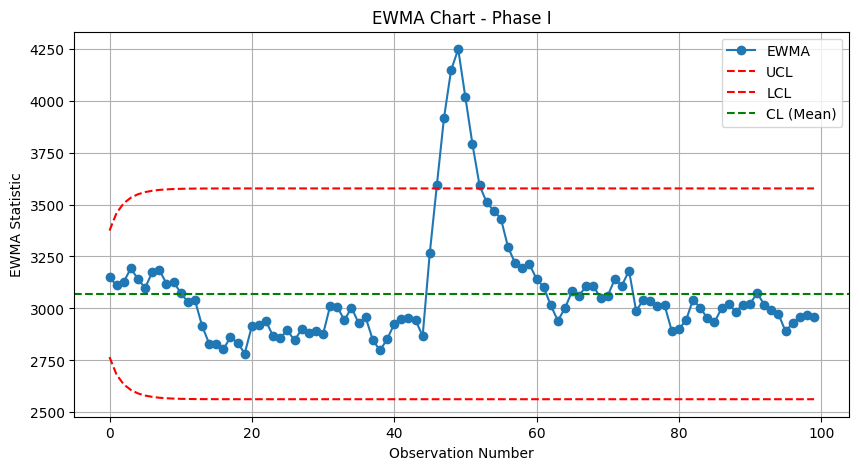

In [9]:
# EWMA parameters
lambda_ = 0.2  # smoothing constant
L = 3          # control width
mu0 = np.mean(ind_data)
sigma = np.std(ind_data, ddof=1)

# EWMA calculation
ewma = [ind_data[0]]  # z_1 = x_1
UCL = []
LCL = []

for i in range(1, len(ind_data) + 1):
    # control limits update at each step
    std_i = sigma * np.sqrt((lambda_ / (2 - lambda_)) * (1 - (1 - lambda_) ** (2 * i)))
    UCL.append(mu0 + L * std_i)
    LCL.append(mu0 - L * std_i)

# continue EWMA recursion
for i in range(1, len(ind_data)):
    z_i = lambda_ * ind_data[i] + (1 - lambda_) * ewma[-1]
    ewma.append(z_i)

# Plot EWMA Chart
plt.figure(figsize=(10, 5))
plt.plot(ewma, label='EWMA', marker='o')
plt.plot(UCL, color='red', linestyle='--', label='UCL')
plt.plot(LCL, color='red', linestyle='--', label='LCL')
plt.axhline(mu0, color='green', linestyle='--', label='CL (Mean)')
plt.title('EWMA Chart - Phase I')
plt.xlabel('Observation Number')
plt.ylabel('EWMA Statistic')
plt.legend()
plt.grid(True)
plt.show()


## 8.2 Interpretation of EWMA Chart (Phase I)

The EWMA chart is effective at revealing **gradual or small shifts** in the process mean by incorporating memory of past observations.

### Observations:
- A pronounced **upward trend** begins around **Observation #45**, peaking sharply above the UCL.
- The EWMA statistic rises gradually, with a smooth accumulation effect — unlike Shewhart charts, which respond abruptly.
- After peaking near Observation #50, the EWMA line slowly returns within the control bounds as the process stabilizes.
- There is also a slight downward trend in earlier observations (before #40), but it remains within limits.

### Conclusion:
- EWMA effectively **confirms the assignable cause** previously identified (observation #46–48) and even provides **early warning**.
- It offers a **smoother and more persistent signal** than traditional charts, ideal for processes where even minor drifts are unacceptable.
- The chart’s performance demonstrates its suitability for high-sensitivity quality environments.


## 9.1 Moving Average (MA) Control Chart

The Moving Average chart smooths out short-term fluctuations by computing the average over a sliding window of recent observations.

---

### 📐 Calculation

Given a window size $w$, the moving average at time $t$ is:

- $MA_t = \frac{1}{w} \sum_{i=t-w+1}^{t} x_i$

This approach reduces noise and highlights trends. It is especially useful when:
- There's high-frequency variation in the data
- You want to detect medium-term shifts

For control limits, we use the following approximation:

- $UCL = \mu_0 + 3 \cdot \frac{\sigma}{\sqrt{w}}$
- $LCL = \mu_0 - 3 \cdot \frac{\sigma}{\sqrt{w}}$

Where:
- $\mu_0$ is the target process mean
- $\sigma$ is the standard deviation of individual observations
- $w$ is the moving window size


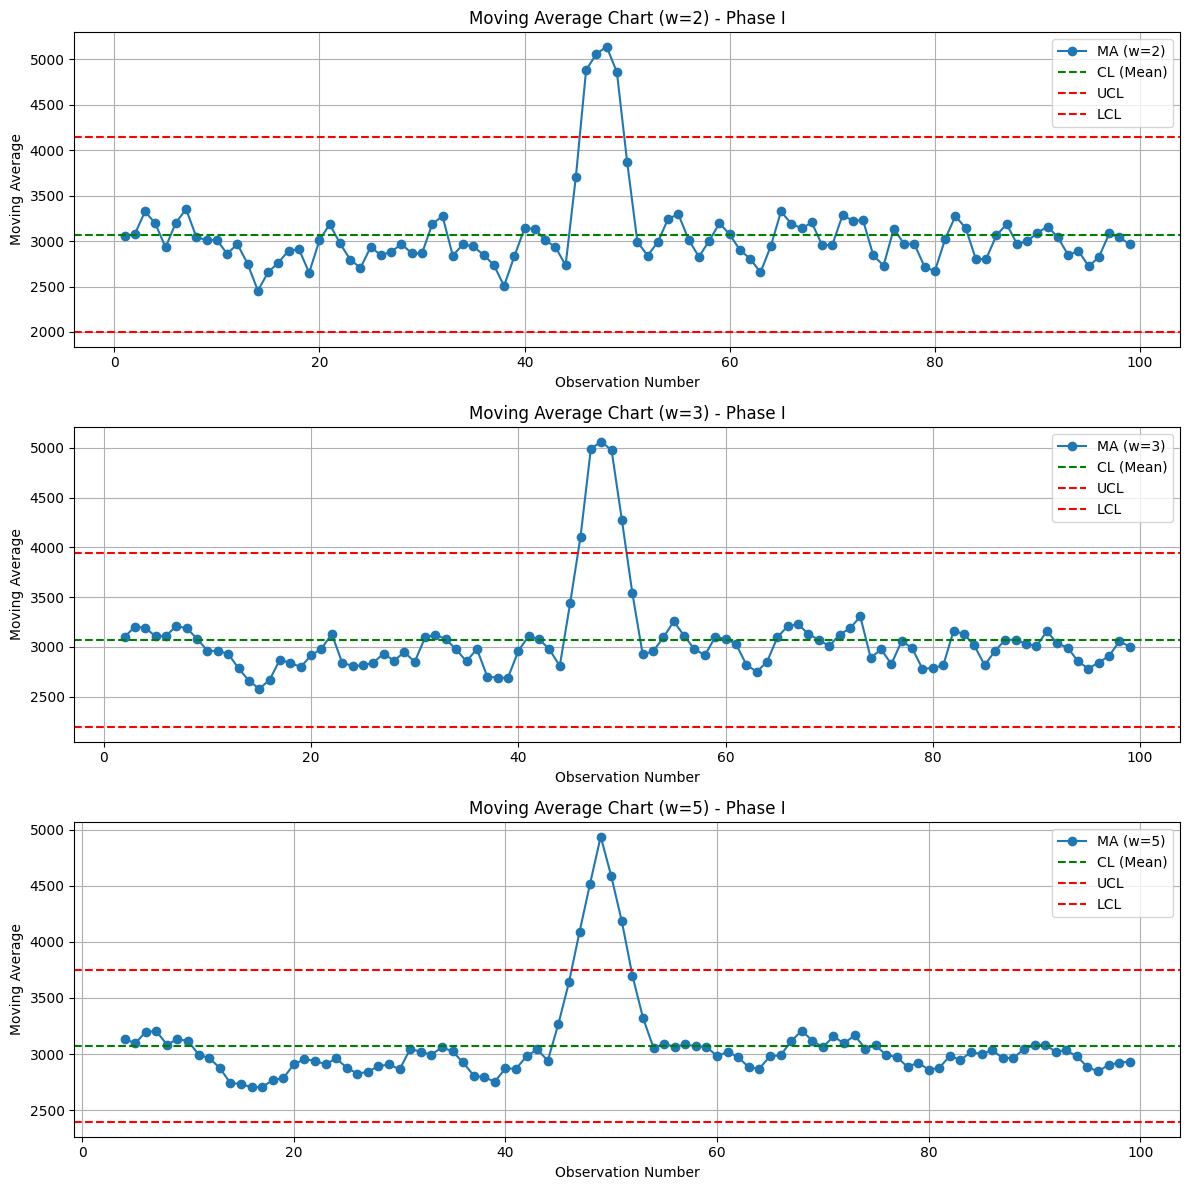

In [11]:
window_sizes = [2, 3, 5]
mu0 = np.mean(ind_data)
sigma = np.std(ind_data, ddof=1)

plt.figure(figsize=(12, 12))

for idx, w in enumerate(window_sizes, 1):
    # Compute control limits
    UCL = mu0 + 3 * sigma / np.sqrt(w)
    LCL = mu0 - 3 * sigma / np.sqrt(w)

    # Compute moving average values
    ma_values = [np.mean(ind_data[i-w+1:i+1]) for i in range(w-1, len(ind_data))]
    x_vals = list(range(w-1, len(ind_data)))

    # Plot subplot
    plt.subplot(len(window_sizes), 1, idx)
    plt.plot(x_vals, ma_values, marker='o', label=f'MA (w={w})')
    plt.axhline(mu0, color='green', linestyle='--', label='CL (Mean)')
    plt.axhline(UCL, color='red', linestyle='--', label='UCL')
    plt.axhline(LCL, color='red', linestyle='--', label='LCL')
    plt.title(f'Moving Average Chart (w={w}) - Phase I')
    plt.xlabel('Observation Number')
    plt.ylabel('Moving Average')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## 9.2 Interpretation of Moving Average Charts (w=2, 3, 5)

Moving Average (MA) charts apply smoothing over recent observations, making it easier to identify underlying trends and shifts.

### Observations:

#### w = 2:
- Shows a **relatively sensitive response** to shifts in the process.
- The spike around Observation #45–48 is **clearly visible** and breaches the UCL.
- Slight fluctuations and short-term variation are still present due to minimal smoothing.

#### w = 3:
- Better smoothing than w=2 while still maintaining **reasonable responsiveness**.
- The same spike is clearly detected.
- Minor variations are further reduced compared to w=2.

#### w = 5:
- Provides **strong smoothing** and filters out most short-term noise.
- The assignable cause still triggers a clear out-of-control signal.
- Reacts more slowly to sharp changes, but highlights sustained shifts very clearly.

### Conclusion:
- All three settings effectively detected the assignable cause.
- Smaller w values provide **faster response** but **retain more noise**.
- Larger w values offer **greater stability**, but **slower detection** of sudden shifts.
- In practice, w is chosen based on the nature of the process and desired sensitivity.

This concludes the analysis of Phase I charts for variables.


## 10. Comparison of Variable Control Charts

This section evaluates the performance of the seven different control charts applied in Phase I. All charts were tested against the same simulated process data, which included at least one known assignable cause.

---

### 🔍 Detection of Assignable Causes

| Chart Type         | Detected Outlier (Sample #9 / Obs #46) | Notes |
|--------------------|----------------------------------------|-------|
| x̄-R Chart          | ✅ Yes                                  | Detected large shift in mean and increased range |
| x̄-s Chart          | ✅ Yes                                  | Similar to x̄-R but more stable for small n |
| x̄-s² Chart         | ✅ Yes                                  | More sensitive to extreme variance |
| I-MR Chart          | ✅ Yes                                  | Detected individual spike and range spike |
| CUSUM Chart         | ✅ Yes                                  | Detected small sustained mean shift early |
| EWMA Chart          | ✅ Yes                                  | Smooth rise, clear detection of shift |
| MA (w=2,3,5) Chart  | ✅ Yes (all)                            | Detected shift with different levels of smoothing |

---

### 📊 Sensitivity vs. Stability

| Chart Type   | Sensitivity to Shifts | Reaction Speed | Stability (Noise Reduction) |
|--------------|-----------------------|----------------|-----------------------------|
| x̄-R         | Moderate              | Moderate       | Moderate                    |
| x̄-s         | Moderate              | Moderate       | Slightly more stable than R |
| x̄-s²        | High (to variance)    | High           | Less stable                 |
| I-MR         | High (single points)  | Fast           | Low                         |
| CUSUM        | Very High (mean)      | Early Warning  | High                        |
| EWMA         | High (mean)           | Smooth Rise    | Very High                   |
| MA           | Adjustable by w       | Adjustable     | Adjustable                  |

---

### 📌 Summary Recommendations

- **For quick detection of large shifts** → Use **x̄-R or I-MR**
- **For persistent mean drift** → Use **CUSUM or EWMA**
- **For better smoothing** → Use **EWMA or MA with w > 3**
- **When variance spikes matter** → Use **x̄-s²**
- **When only individual observations are available** → Use **I-MR, CUSUM, EWMA**

Each control chart has its strengths. In practice, using a combination of Shewhart and memory-type charts (like EWMA or CUSUM) gives the most robust monitoring system.


## 11.1 P Chart – Proportion of Nonconforming Items

The **P chart** is used to monitor the **fraction of defective items** in a process. It is applicable when:
- Each item is classified as conforming or nonconforming
- The sample size may vary across subgroups

---

### 📐 Control Limits for P Chart

Let:
- $p_i = \frac{d_i}{n_i}$ be the proportion of nonconforming items in sample *i*
- $p̄ = \frac{\sum d_i}{\sum n_i}$ be the overall average proportion
- $n_i$ = sample size of subgroup *i*

Then control limits are calculated as:

- $UCL_i = p̄ + 3 \cdot \sqrt{\frac{p̄ (1 - p̄)}{n_i}}$
- $LCL_i = p̄ - 3 \cdot \sqrt{\frac{p̄ (1 - p̄)}{n_i}}$

If $LCL_i < 0$, set it to 0.

---

### 🔧 Assumption

For this example, we'll **simulate a dataset** of nonconforming counts and varying sample sizes to demonstrate the chart.


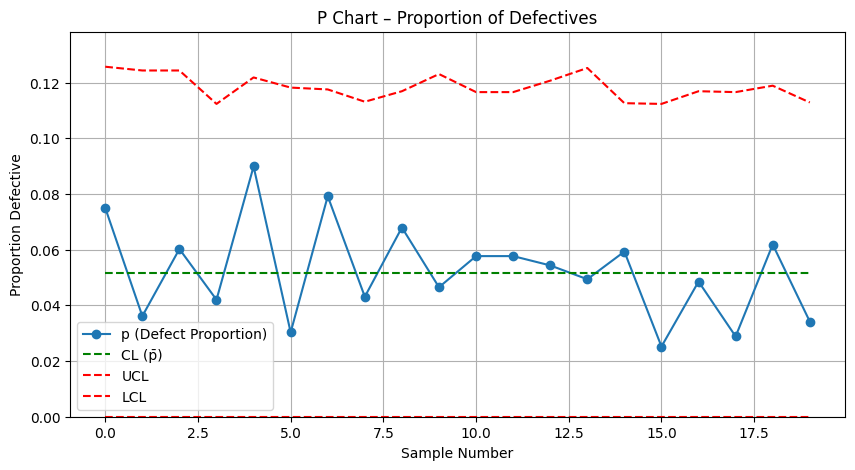

In [12]:
import numpy as np

# Simulated data for attribute chart
np.random.seed(0)
num_samples = 20
sample_sizes = np.random.randint(80, 120, size=num_samples)  # varying subgroup sizes
defect_counts = np.random.binomial(sample_sizes, 0.05)  # simulate 5% defect rate
p_i = defect_counts / sample_sizes
p_bar = np.sum(defect_counts) / np.sum(sample_sizes)

# Calculate control limits
UCL = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / sample_sizes)
LCL = p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / sample_sizes)
LCL = np.clip(LCL, 0, 1)  # no negative lower bounds

# Plot P chart
plt.figure(figsize=(10, 5))
plt.plot(p_i, marker='o', label='p (Defect Proportion)')
plt.plot([p_bar]*num_samples, color='green', linestyle='--', label='CL (p̄)')
plt.plot(UCL, color='red', linestyle='--', label='UCL')
plt.plot(LCL, color='red', linestyle='--', label='LCL')
plt.title('P Chart – Proportion of Defectives')
plt.xlabel('Sample Number')
plt.ylabel('Proportion Defective')
plt.ylim(0, max(UCL)*1.1)
plt.legend()
plt.grid(True)
plt.show()


## 11.2 Interpretation of P Chart

The P chart monitors the **proportion of defective units** in each subgroup, adjusting control limits based on varying sample sizes.

### Observations:
- All data points lie **within the control limits**, with no out-of-control conditions observed.
- Some subgroups (e.g., #5 and #7) show elevated defect proportions, but they remain statistically acceptable.
- The upper control limit (UCL) varies slightly between samples due to different subgroup sizes.

### Conclusion:
- The process appears to be **in control** with respect to defect proportion.
- There is **natural variability** between subgroups, but no sign of assignable causes.
- P charts are useful when sample sizes vary and you are tracking **percentage-based quality metrics**.

Next, we will construct the **np Chart**, which focuses on the count (not the proportion) of defective items with constant sample size.


## 11.3 np Chart – Number of Defectives in Constant Sample Size

The **np Chart** is a control chart used to monitor the **number of nonconforming (defective) items** in a sample, assuming that the sample size is **constant** for all subgroups.

It is a variant of the P chart where:

- The number of nonconforming units $d_i$ is tracked directly (not as a proportion)
- The sample size $n$ is the same for all subgroups

---

### 📐 Control Limits for np Chart

Let:
- $d_i$ = number of defectives in sample *i*  
- $n$ = constant sample size  
- $p̄ = \frac{\sum d_i}{n \cdot k}$ = average proportion defective across *k* subgroups

Then control limits are calculated as:

- $CL = n \cdot p̄$
- $UCL = n \cdot p̄ + 3 \cdot \sqrt{n \cdot p̄ \cdot (1 - p̄)}$
- $LCL = n \cdot p̄ - 3 \cdot \sqrt{n \cdot p̄ \cdot (1 - p̄)}$

If LCL < 0, it is set to 0.


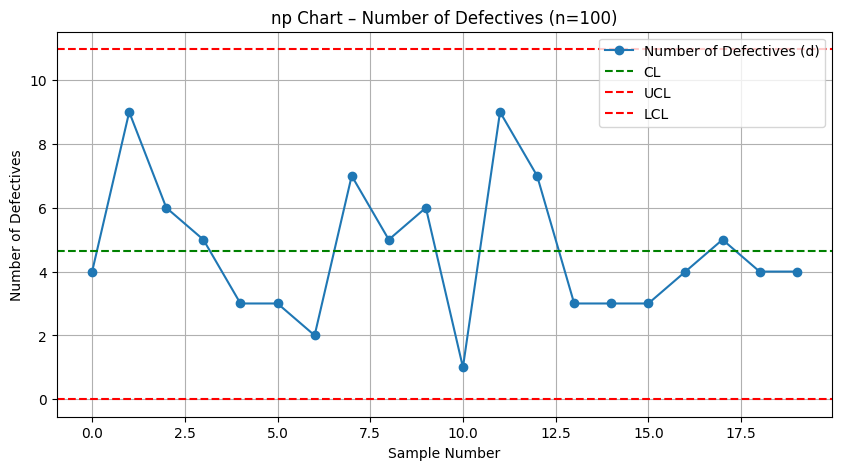

In [13]:
# Simulate constant sample size and defectives
n = 100  # constant sample size
np.random.seed(42)
defect_counts = np.random.binomial(n, 0.05, size=20)  # 5% defect rate assumed
p_bar = np.mean(defect_counts) / n  # average proportion defective

# Control limits
CL = n * p_bar
UCL = CL + 3 * np.sqrt(n * p_bar * (1 - p_bar))
LCL = CL - 3 * np.sqrt(n * p_bar * (1 - p_bar))
LCL = max(0, LCL)  # no negative lower limit

# Plot np Chart
plt.figure(figsize=(10, 5))
plt.plot(defect_counts, marker='o', label='Number of Defectives (d)')
plt.axhline(CL, color='green', linestyle='--', label='CL')
plt.axhline(UCL, color='red', linestyle='--', label='UCL')
plt.axhline(LCL, color='red', linestyle='--', label='LCL')
plt.title('np Chart – Number of Defectives (n=100)')
plt.xlabel('Sample Number')
plt.ylabel('Number of Defectives')
plt.legend()
plt.grid(True)
plt.show()


## 11.4 Interpretation of np Chart

The np chart tracks the **absolute number of defectives** in a sample, assuming a constant sample size across all subgroups.

### Observations:
- All points fall **within control limits**, indicating the process is statistically in control.
- Sample #10 shows the **lowest defect count (1)**, while Sample #2 and #12 peak near the UCL, but still remain acceptable.
- The chart provides a **clear and intuitive view** of defect count behavior without converting to proportions.

### Conclusion:
- No assignable causes are detected.
- The process is consistent in terms of the number of defectives per 100 units.
- np charts are particularly suitable for **visualizing raw counts** in production settings where a fixed number of units are inspected regularly.


## 11.5 U Chart – Number of Defects per Unit

The **U chart** is used to monitor the **average number of defects per unit** in subgroups where:
- Each unit can have **multiple defects**
- Sample size may vary across subgroups

---

### 📐 Control Limits for U Chart

Let:
- $c_i$ = number of defects in sample *i*  
- $n_i$ = number of inspected units in sample *i*  
- $u_i = \frac{c_i}{n_i}$ = defects per unit  
- $\bar{u} = \frac{\sum c_i}{\sum n_i}$ = overall average defects per unit

Then control limits for each sample are:

- $UCL_i = \bar{u} + 3 \cdot \sqrt{\frac{\bar{u}}{n_i}}$
- $LCL_i = \bar{u} - 3 \cdot \sqrt{\frac{\bar{u}}{n_i}}$

If $LCL_i < 0$, it is set to 0.


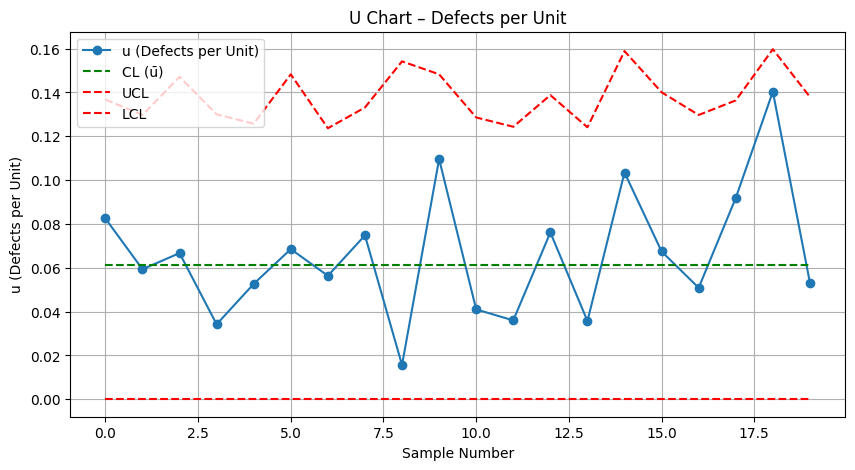

In [15]:
# Simulate defects and varying sample sizes
np.random.seed(7)
num_samples = 20
sample_sizes = np.random.randint(50, 150, size=num_samples)  # varying n_i
defect_counts = np.random.poisson(lam=5, size=num_samples)   # simulate multiple defects
u_i = defect_counts / sample_sizes
u_bar = np.sum(defect_counts) / np.sum(sample_sizes)

# Calculate control limits
UCL = u_bar + 3 * np.sqrt(u_bar / sample_sizes)
LCL = u_bar - 3 * np.sqrt(u_bar / sample_sizes)
LCL = np.clip(LCL, 0, None)

# Plot U Chart
plt.figure(figsize=(10, 5))
plt.plot(u_i, marker='o', label='u (Defects per Unit)')
plt.plot([u_bar]*num_samples, color='green', linestyle='--', label='CL (ū)')
plt.plot(UCL, color='red', linestyle='--', label='UCL')
plt.plot(LCL, color='red', linestyle='--', label='LCL')
plt.title('U Chart – Defects per Unit')
plt.xlabel('Sample Number')
plt.ylabel('u (Defects per Unit)')
plt.legend()
plt.grid(True)
plt.show()


## 11.6 Interpretation of U Chart

The U chart monitors the **average number of defects per unit**, especially useful when:
- Sample sizes vary
- Each unit can have multiple defects

### Observations:
- All points remain **within control limits**, even though there is noticeable variation across subgroups.
- Sample #18 shows the **highest defect density**, while Sample #9 is the lowest.
- The control limits adjust according to sample size, keeping the chart sensitive but stable.

### Conclusion:
- The process is **in statistical control** based on average defect counts.
- U charts are ideal for **normalizing defect rates** when sample sizes are not fixed.
- No assignable causes are indicated in the current dataset.


## 11.7 C Chart – Count of Defects per Sample (Constant n)

The **C chart** is used to monitor the **number of defects** in a process when:
- Sample size is constant
- Each unit can contain multiple defects
- We're counting **total defects** in a fixed number of inspection units

This chart assumes the number of defects per sample follows a **Poisson distribution**.

---

### 📐 Control Limits for C Chart

Let:
- $c_i$ = number of defects in sample *i*  
- $\bar{c} = \frac{1}{k} \sum_{i=1}^{k} c_i$

Then the control limits are:

- $UCL = \bar{c} + 3 \cdot \sqrt{\bar{c}}$
- $LCL = \bar{c} - 3 \cdot \sqrt{\bar{c}}$

If $LCL < 0$, set it to 0.


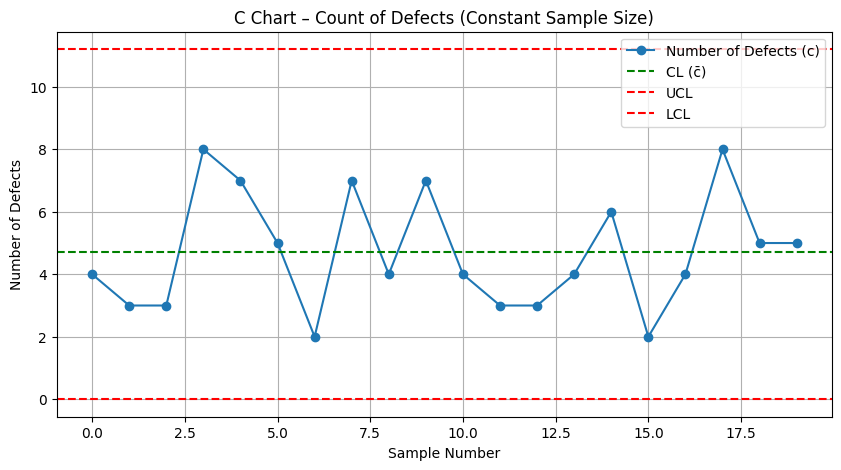

In [16]:
# Simulate constant sample size and defects per sample
np.random.seed(10)
num_samples = 20
defect_counts = np.random.poisson(lam=5, size=num_samples)  # total defects in fixed-size sample
c_bar = np.mean(defect_counts)

# Control limits
UCL = c_bar + 3 * np.sqrt(c_bar)
LCL = max(0, c_bar - 3 * np.sqrt(c_bar))

# Plot C Chart
plt.figure(figsize=(10, 5))
plt.plot(defect_counts, marker='o', label='Number of Defects (c)')
plt.axhline(c_bar, color='green', linestyle='--', label='CL (c̄)')
plt.axhline(UCL, color='red', linestyle='--', label='UCL')
plt.axhline(LCL, color='red', linestyle='--', label='LCL')
plt.title('C Chart – Count of Defects (Constant Sample Size)')
plt.xlabel('Sample Number')
plt.ylabel('Number of Defects')
plt.legend()
plt.grid(True)
plt.show()


## 11.8 Interpretation of C Chart

The C chart monitors the **count of defects per sample** under the assumption that the sample size remains constant.

### Observations:
- All defect counts lie **within control limits**, indicating the process is statistically in control.
- Sample #4 and #18 have relatively higher defect counts, but still do not breach the UCL.
- There is some natural fluctuation, which is expected in a Poisson-distributed defect process.

### Conclusion:
- No assignable causes are detected.
- The process is consistent in terms of total defect count per sample.
- C charts are ideal for **counting total defects** when each subgroup is of the same size.


## 12.1 Phase II Monitoring Strategy

In Phase I, we identified Sample #9 as an out-of-control subgroup due to a large shift in mean.

### Objective:
- **Remove out-of-control subgroups** (e.g., Sample #9) from Phase I data.
- **Recalculate control limits** using only stable data.
- Apply these limits to Phase II data (e.g., Sample #21 to #25).
- Determine whether the current process remains in control over time.

This ensures we are **not influenced by anomalies** while monitoring ongoing production.


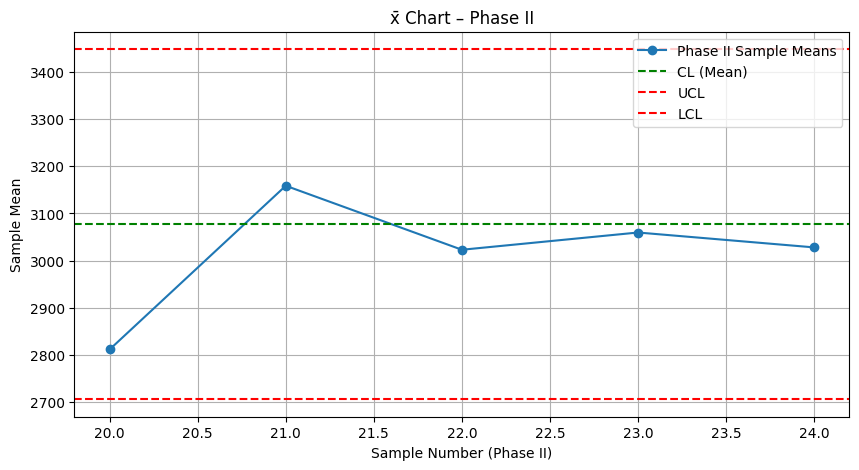

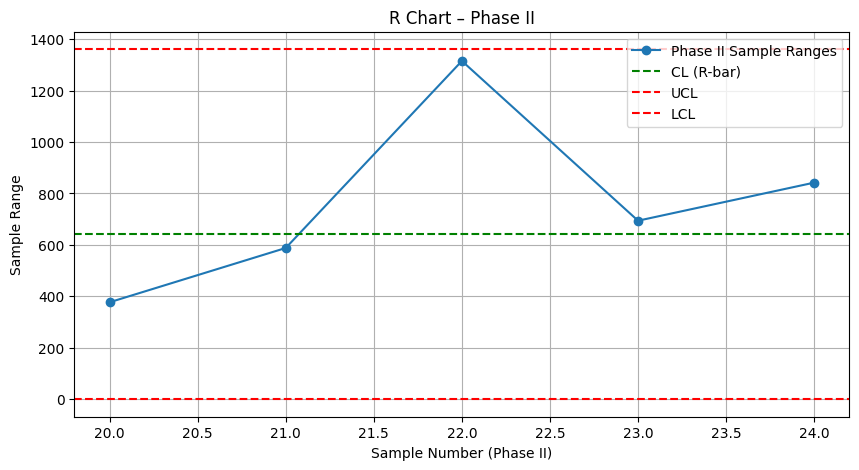

In [17]:
# Prepare Phase I data with Sample #9 removed
clean_phase1 = df.iloc[:20, :5].drop(index=8)  # Sample #9 is at index 8 (0-based)

# Recalculate control statistics
sample_means = clean_phase1.mean(axis=1)
sample_ranges = clean_phase1.max(axis=1) - clean_phase1.min(axis=1)
x_bar_bar = sample_means.mean()
R_bar = sample_ranges.mean()

# Constants for n=5
A2 = 0.577
D3 = 0
D4 = 2.114

# New control limits
UCL_x = x_bar_bar + A2 * R_bar
LCL_x = x_bar_bar - A2 * R_bar
UCL_R = D4 * R_bar
LCL_R = D3 * R_bar

# Get Phase II data (Samples #21 to #25)
phase2 = df.iloc[20:25, :5]
phase2_means = phase2.mean(axis=1)
phase2_ranges = phase2.max(axis=1) - phase2.min(axis=1)

# --- Phase II x̄ Chart ---
plt.figure(figsize=(10, 5))
plt.plot(phase2_means, marker='o', label='Phase II Sample Means')
plt.axhline(y=x_bar_bar, color='green', linestyle='--', label='CL (Mean)')
plt.axhline(y=UCL_x, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_x, color='red', linestyle='--', label='LCL')
plt.title('x̄ Chart – Phase II')
plt.xlabel('Sample Number (Phase II)')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.show()

# --- Phase II R Chart ---
plt.figure(figsize=(10, 5))
plt.plot(phase2_ranges, marker='o', label='Phase II Sample Ranges')
plt.axhline(y=R_bar, color='green', linestyle='--', label='CL (R-bar)')
plt.axhline(y=UCL_R, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_R, color='red', linestyle='--', label='LCL')
plt.title('R Chart – Phase II')
plt.xlabel('Sample Number (Phase II)')
plt.ylabel('Sample Range')
plt.legend()
plt.grid(True)
plt.show()


## 12.2 Interpretation of Phase II Monitoring

After removing Sample #9 (identified as an assignable cause), control limits were recalculated based on stable Phase I data. These limits were applied to **new data from Phase II** (Sample #21–25).

---

### x̄ Chart Observations:
- All subgroup means in Phase II fall **within the control limits**.
- The values fluctuate slightly, which is expected in a stable process.
- There is **no sign of a shift or trend** suggesting a mean drift.

### R Chart Observations:
- Sample #22 exhibits the **highest range**, approaching the UCL, but remains **in control**.
- Other samples show **moderate variability**, consistent with Phase I limits.

---

### Conclusion:
- The process appears to be **in statistical control** during Phase II.
- No assignable causes are detected in the new observations.
- The control limits calculated from cleaned Phase I data have proven **valid and reliable** for monitoring ongoing production.

This concludes the control chart application across Phase I and Phase II.


## 12.3 x̄-s Chart – Phase II

In Phase II, we apply the control limits calculated from Phase I (excluding outliers) to **new data** (Sample #21–25). The x̄-s chart monitors both the **central tendency** (mean) and **within-group variability** (standard deviation).

This allows us to assess if the process remains stable in both location and spread.


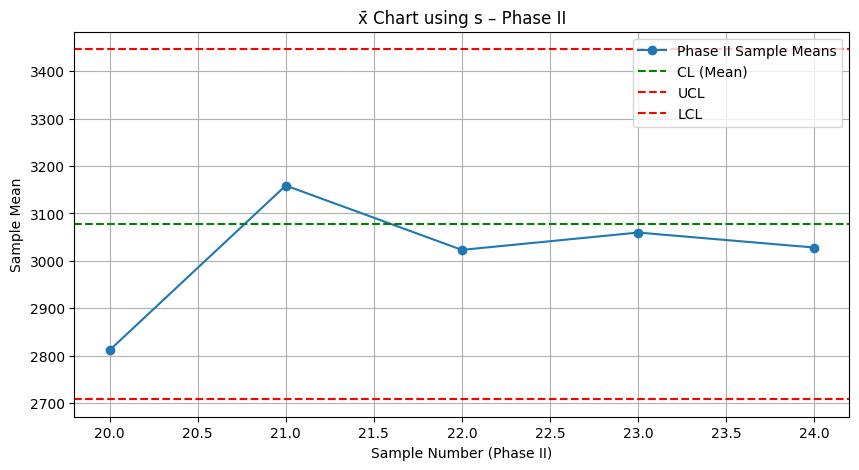

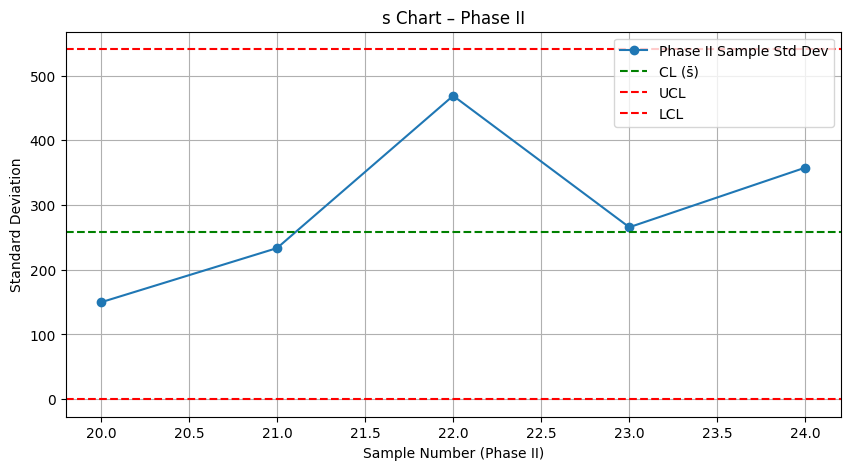

In [18]:
# Recalculate Phase I limits (excluding Sample #9) for s chart
clean_phase1 = df.iloc[:20, :5].drop(index=8)
sample_means = clean_phase1.mean(axis=1)
sample_stds = clean_phase1.std(axis=1, ddof=1)
x_bar_bar = sample_means.mean()
s_bar = sample_stds.mean()

# Constants for n=5
A3 = 1.427
B3 = 0
B4 = 2.089

# Control limits
UCL_x = x_bar_bar + A3 * s_bar
LCL_x = x_bar_bar - A3 * s_bar
UCL_s = B4 * s_bar
LCL_s = B3 * s_bar

# Phase II data: Sample #21–25
phase2 = df.iloc[20:25, :5]
phase2_means = phase2.mean(axis=1)
phase2_stds = phase2.std(axis=1, ddof=1)

# --- x̄ Chart ---
plt.figure(figsize=(10, 5))
plt.plot(phase2_means, marker='o', label='Phase II Sample Means')
plt.axhline(y=x_bar_bar, color='green', linestyle='--', label='CL (Mean)')
plt.axhline(y=UCL_x, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_x, color='red', linestyle='--', label='LCL')
plt.title('x̄ Chart using s – Phase II')
plt.xlabel('Sample Number (Phase II)')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.show()

# --- s Chart ---
plt.figure(figsize=(10, 5))
plt.plot(phase2_stds, marker='o', label='Phase II Sample Std Dev')
plt.axhline(y=s_bar, color='green', linestyle='--', label='CL (s̄)')
plt.axhline(y=UCL_s, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_s, color='red', linestyle='--', label='LCL')
plt.title('s Chart – Phase II')
plt.xlabel('Sample Number (Phase II)')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()


## 12.4 Interpretation of x̄-s Chart – Phase II

In this stage, we apply Phase I control limits (excluding outliers) to **new subgroup data** (Samples #21–25) to monitor both the process mean and standard deviation.

---

### x̄ Chart Observations:
- All Phase II subgroup means are **well within control limits**.
- The values show typical variation around the center line, indicating a stable process center.

### s Chart Observations:
- Sample #22 shows the **highest standard deviation**, but it remains within UCL.
- Other samples fluctuate moderately and follow a stable variability pattern.

---

### Conclusion:
- The process remains **in control** in terms of both central tendency and dispersion.
- No assignable causes or instability are detected in Phase II.
- The x̄-s chart confirms the reliability of Phase I limits when applied to future data.
